In [1]:
# imports
# numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# estimators 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

# model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# cross validation
from sklearn.model_selection import train_test_split

In [2]:
#inital formatting
df = pd.read_csv('../creditOne.csv')
df.drop(labels="Unnamed: 0", axis="columns", inplace=True)
df["DEFAULT_NEXT_MONTH"] = df["DEFAULT_NEXT_MONTH"].astype('category')
df["SEX"] = df["SEX"].astype("category")
df["EDUCATION"] = df["EDUCATION"].astype("category")
df["MARRIAGE"] = df["MARRIAGE"].astype("category").cat.as_ordered()
df["SEX"] = df["SEX"].astype("category")
df["ID"] = df["ID"].apply(str).astype("string")

In [3]:
# spreading category columns
def sexConvertor(str):
    return '1 0' if str == "female" else '0 1'
def educationConverter(str):
    if str == "graduate school": return '1 0 0 0'
    if str == "high school": return '0 1 0 0'
    if str == "other": return '0 0 1 0'
    if str == "university": return '0 0 0 1'
    return '0 0 0 0' 
def marriageConverter(str):
    if str == "0": return '1 0 0 0'
    if str == "1": return '0 1 0 0'
    if str == "2": return '0 0 1 0'
    if str == "3": return '0 0 0 1'
    return '0 0 0 0'

df[["SEX_FEMALE", "SEX_MALE"]] = df["SEX"].map(sexConvertor).str.split(' ',expand=True).replace("0", False).replace("1",True)
df[["ED_GRAD", "ED_HS", "ED_OTHER", "ED_UNI"]] = df["EDUCATION"].map(educationConverter).str.split(' ',expand=True).replace("0", False).replace("1",True)
df[["MARRIAGE_0", "MARRIAGE_1", "MARRIAGE_2", "MARRIAGE_3"]] = df["MARRIAGE"].map(marriageConverter).str.split(' ',expand=True).replace("0", False).replace("1",True)

df["DEFAULT_NEXT_MONTH"] = df["DEFAULT_NEXT_MONTH"].replace("default",True).replace("not default", False).astype("bool")

In [4]:
print("INFO:______________________")
print(df.info())
print("\n\nDESCRIBE:__________________")
print(df.describe())
print("\n\nHEAD:______________________")
print(df.head())

INFO:______________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  30000 non-null  string  
 1   LIMIT_BAL           30000 non-null  float64 
 2   SEX                 30000 non-null  category
 3   EDUCATION           30000 non-null  category
 4   MARRIAGE            30000 non-null  category
 5   AGE                 30000 non-null  float64 
 6   PAY_0               30000 non-null  float64 
 7   PAY_2               30000 non-null  float64 
 8   PAY_3               30000 non-null  float64 
 9   PAY_4               30000 non-null  float64 
 10  PAY_5               30000 non-null  float64 
 11  PAY_6               30000 non-null  float64 
 12  BILL_AMT1           30000 non-null  float64 
 13  BILL_AMT2           30000 non-null  float64 
 14  BILL_AMT3           30000 non-null  float64 
 15  BILL_AMT




Using regression algorithms to see if we can get a helpful model

In [5]:
# define x and y variables
yLabel = "LIMIT_BAL"
X = df.drop(
    [ 
        yLabel,
        "SEX",
        "EDUCATION",
        "MARRIAGE"
    ], axis="columns"
)
y = df[yLabel]


# algorthim to run: 
# Random Forest Regressor, Linear Regression, Support Vector Regression
algos = [
    ("Random Forest Regressor", RandomForestRegressor()),
    ("Linear Regression", LinearRegression()),
    ("Support Vetor Regression", SVR())
]

results = []

for name, algo in algos: 
    print("Running: " + name)
    results.append((name, cross_val_score(algo, X,y, cv=5, scoring='r2')))
    print("Finished: " + name)

Running: Random Forest Regressor
Finished: Random Forest Regressor
Running: Linear Regression
Finished: Linear Regression
Running: Support Vetor Regression
Finished: Support Vetor Regression


In [6]:
for name, result in results:
    print(name, result.mean())

Random Forest Regressor 0.4507370548964886
Linear Regression 0.35435897546294676
Support Vetor Regression -0.040307704434648796


In [9]:
# training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

algo = RandomForestRegressor()
model = algo.fit(X_train,y_train)

In [14]:
# critique results
predictions = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, predictions))
predRsquared = r2_score(y_test,predictions)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.476
RMSE: 94643.876


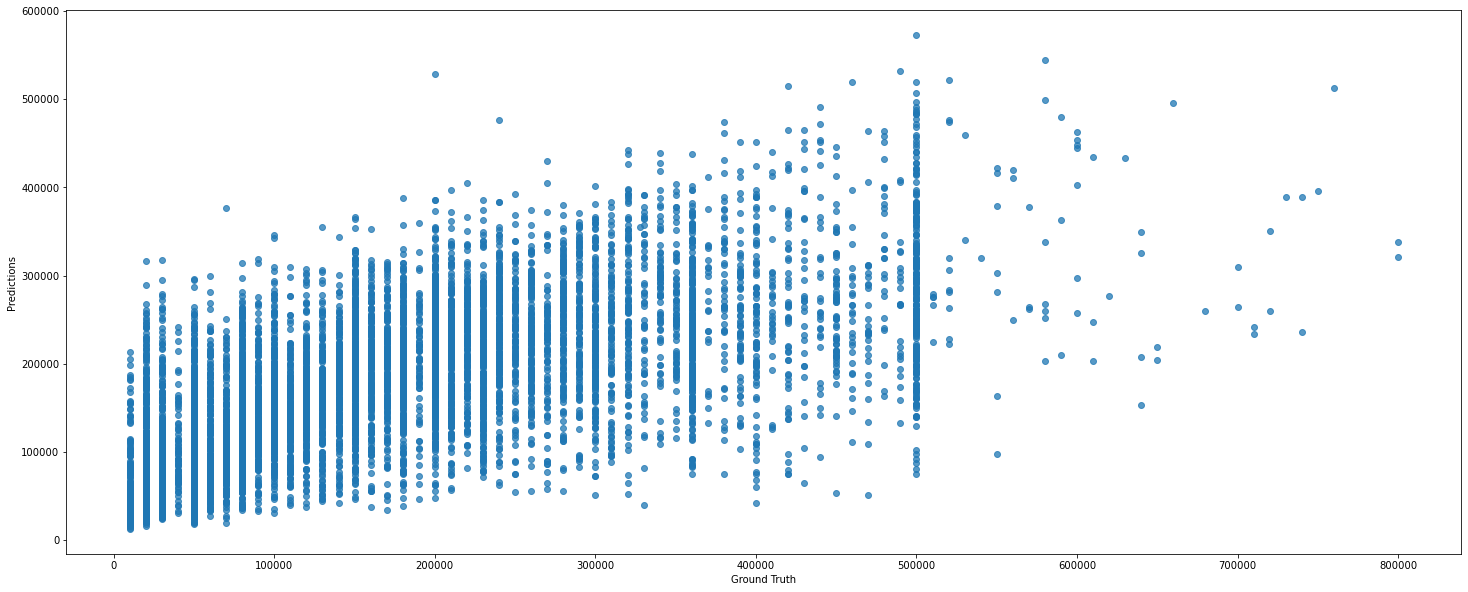

In [26]:
# plotting the results
plt.figure(figsize=(25,10))
plt.scatter(y_test, predictions, alpha = 0.75)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();